# Project Overview

In a short paragragh describe the problem you want to explore use data science techniques

Based on a Genre Artist in said Genre make more money because the release more music.
By look at current artist in the music industry. We can find which genre of artist make more money by stream count, concert ticket sales, and or brand deals,
One web scrap source and existing data source and ad to the data by scraping from the web.
Subject matter expertise which sources now the most about this topic.  

- Comparing  Music Artist
- Stream count
- Songs
- Salaries 
- Genre 

# Problem Description
In one sentence describe the problem you want to explore with data science
    1. Which Music genre has claimed the most sales from the second have of the 20th centry to Present?
    2. Which artist has had the most songs in the Spotify Weekly Top 200 Streams (2017-2018)?

# Subject Matter Expertise

In bulleted format, describe the subject matters that will help you explore your topic. Example:
 
1. Data Analysis
2. Data Visualization
3. Statistics and Probability
4. Hypothesis Testing
5. Linear Regression

# Assumptions
List any assumptions you may have about the topic. 
`Assumptions are a thing that is accepted as true or as certain to happen, without proof.`
    - Music is always being release for on stream platform so for this project will online be using data from these data sources.
    - Web-scraping from wikepiada created added unexpected characters in some of the cells they must be cleaned.

# Steps to Explore the Topic and Problem

List the steps you're going to take to explore the topic using the data sources you identify and the techniques you already know. Please list them as step 1, step 2, step 3. Example:

1. Download data from U.S. Census
2. Web-scrape data from IMDB
3. Find the number of actors that do not live in california
4. Calculate the median salary for actors that do not live in California
5. Show the relationship between actors living in CA vs outside CA with pie chart
6. Show relationship between actors' salary living in CA vs outside CA with bar chart
7. Calculate median home price of homes in CA using web scrape data
8. Compare this to median salary for actors using bar chart
9. Make some intitial Conclusions on actor salary, location, and median home price on if actors can afford to live in CA.

For Web-Scrape Data:
1. Web-scrape data from wikipedia on the Best Selling Music Artist
2. Get a List of all the unique Genres in the data set
3. Find the number of Artist for each Genre
4. Calculate the median record sales for Artist for each Genre
5. Show the number of record Sale for each Genre in millions using a Bar chart

For Kaggle Data:
1. Downlad Data from Kaggle on songs from Billboard 1999-2019
2. Select Spotify Weekly Top 200 Streams (spotifyWeeklyTop200Streams.csv)
3. Creat at table 

In [3]:
# Imports
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
 
from urllib.request import urlopen
from bs4 import BeautifulSoup
from tabulate import tabulate

print("Imports done")

Imports done


***Best Selling music Artist***

In [57]:
# Web - Scraping 

# Opening the and reading the wikipedia's url.
url = "https://en.wikipedia.org/wiki/List_of_best-selling_music_artists"
html = urlopen(url)
soup = BeautifulSoup(html.read(),'html.parser')
# Finding all table tags within the HTML tree. This will return a ResultSet of
# table tags.
table = soup.find_all('table') 

# Convert table variable to string for parsing and have pandas take the html
# and convert it into a dataframe.
df = pd.read_html(str(table))

# Get the 6 tables from wikipedia and turn them into dataframes
table_250_or_more = pd.DataFrame(df[0])
table_200_to_249 = pd.DataFrame(df[1])
table_120_to_199 = pd.DataFrame(df[2])
table_100_or_119 = pd.DataFrame(df[3])
table_80_or_99 = pd.DataFrame(df[4])
table_75_or_79 = pd.DataFrame(df[5])

# Combine the six tables into on big one.
raw_best_selling_artist = pd.concat([table_250_or_more, table_200_to_249, table_120_to_199, 
                                 table_100_or_119, table_80_or_99, table_80_or_99,table_75_or_79])


# Raw web-scraped data of combined tables
raw_best_selling_artist

,Artist,Country / Market,Period active,Release year of first charted record,Genre,Total certified units(from available markets)[a],Claimed sales,Release-year of first charted record
0,The Beatles,United Kingdom,1960–1970[10],1962[10],Rock / Pop[10],Total available certified units: 281.3 million...,600 million[38][39]500 million[40],NaN
1,Elvis Presley,United States,1954–1977[41],1954[41],Rock and roll / Pop / Country[41],Total available certified units: 226.3 million...,600 million[50][51]500 million[52],NaN
2,Michael Jackson,United States,1964–2009[53],1971[53],Pop / Rock / Dance / Soul / R&B[53],Total available certified units: 233 million U...,350 million[63][64]300 million[65][66],NaN
3,Elton John,United Kingdom,1964–present[67],1969[67],Pop / Rock[67],Total available certified units: 193.1 million...,300 million[70][71]250 million[72][73],NaN
4,Madonna,United States,1979–present[74],1982[74],Pop / Dance / Electronica[74],Total available certified units: 173.8 million...,300 million[80][81]275 million[82],NaN
5,Led Zeppelin,United Kingdom,1968–1980[83],1969[83],Hard rock / Blues rock / Folk rock[83],Total available certified units: 141.3 million...,300 million[87][88]200 million[89][90],NaN
6,Rihanna,BarbadosUnited States,2005–present[91],2005[91],R&B / Pop / Dance / Hip-hop[91],Total available certified units: 282.6 million...,250 million[96][97],NaN
7,Pink Floyd,United Kingdom,"1965–1996, 2005, 2012–2014[98][99]",1967[98],Progressive rock / Psychedelic rock[98],Total available certified units: 121.5 million...,250 million[101][102]200 million[103],NaN
0,Eminem,United States,1996–present[104],NaN,Hip-hop[104],Total available certified units: 238.1 million...,220 million[105],1999[104]
1,Taylor Swift,United States,2006–present[106],NaN,Pop / Synth-pop / Country / Country pop / [106],Total available certified units: 217 million U...,200 million[108][109],2006[106]


***Spotify Weekly Top 200 Streams***

In [4]:
#spotifyWeeklyTop200Streams.csv
spotifyWeeklyTop200Streams = pd.read_csv("spotifyWeeklyTop200Streams.csv")

# Dropped the extra index column
spotifyWeeklyTop200Streams = spotifyWeeklyTop200Streams.drop(columns=['Unnamed: 0'])
spotifyWeeklyTop200Streams

,Name,Artist,Features,Streams,Week
0,In My Feelings,Drake,NaN,30747676,2018-07-20
1,Lucid Dreams,Juice WRLD,NaN,12930705,2018-07-20
2,Nonstop,Drake,NaN,12312859,2018-07-20
3,God is a woman,Ariana Grande,NaN,10771324,2018-07-20
4,SAD!,XXXTENTACION,NaN,10503061,2018-07-20
...,...,...,...,...,...
26390,R.I.P. SCREW,Travis Scott,NaN,1521806,2018-09-14
26391,Rich & Sad,Post Malone,NaN,1518345,2018-09-14
26392,The Way Life Goes,Lil Uzi Vert,Oh Wonder,1516966,2018-09-14
26393,broken,lovelytheband,NaN,1486767,2018-09-14


# Data Sources:

In bulleted format, list where you will get data from. Data sources must include one existing data source and web-scrapted source. Example:

1. U.S. Census Estimates of the Total Resident Population and Resident Population Age 18 Years and Older for the United States, States, and Puerto Rico `https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/state/detail/SCPRC-EST2019-18+POP-RES.csv`
2. Kaggle Elon Musk Tweets 'https://www.kaggle.com/kingburrito666/elon-musk-tweets'

Data Sources
1. Data on songs from Billboard 1999-2019. Including:
    - Billboard Hot 100 
    - Spotify (and their API) 
    - Genius, 
    - Recording Academy Grammy Awards
    - Recording Industry Association of America (RIAA)
https://www.kaggle.com/danield2255/data-on-songs-from-billboard-19992019?select=BillboardFromLast20

2. List of best Selling music Artist from the second half of the 20th centry to the present. 
`https://en.wikipedia.org/wiki/List_of_best-selling_music_artists`


# Data Cleaning
Show techniques you use to reduce impact of outliers, drop missing, or null values (if any). 

Must show the total number of null or missing values.

Must describe rows or columns dropped.

What was the strategy for dropping outliers?

***Best Selling music Artist***

In [59]:
# Total number of null or missing values  
raw_best_selling_artist.isnull().sum().sum() 

136

In [60]:
# Rename column in order to fix web-scraping mistakes
raw_best_selling_artist = raw_best_selling_artist.rename(columns={"Release-year of first charted record": "B",
                                    "Release year of first charted record": "A"})
# raw_best_selling_artist

In [61]:
# Replace the nan values with there correct values 
# orignally thy were split into to separate columns
raw_best_selling_artist['A'].fillna(raw_best_selling_artist['B'], inplace = True)

# raw_best_selling_artist

In [62]:
# Rename the column to the proper name 
raw_best_selling_artist = raw_best_selling_artist.rename(columns={"A":"Release year of first charted record",
                                                         "Total certified units(from available markets)[a]":"Total certified units(from available markets) in millions"})
# raw_best_selling_artist

In [63]:
# Remove the extra column
del raw_best_selling_artist['B']

# raw_best_selling_artist

In [64]:
# Remove subsript numbers from data
raw_best_selling_artist['Period active'] = raw_best_selling_artist['Period active'].str.split('[').str[0]
raw_best_selling_artist['Release year of first charted record'] = raw_best_selling_artist['Release year of first charted record'].str.split('[').str[0]
raw_best_selling_artist['Genre'] = raw_best_selling_artist['Genre'].str.split('[').str[0]
raw_best_selling_artist['Claimed sales'] = raw_best_selling_artist['Claimed sales'].str.split('[').str[0]

# raw_best_selling_artist

In [65]:
# Remove millions from Total certified units, and Claimed sales then convert to doubles
#best_selling_artist['Total certified units(from available markets)'] = best_selling_artist['Total certified units(from available markets)'].str.replace('\d+','')
raw_best_selling_artist['Total certified units(from available markets) in millions'] = raw_best_selling_artist['Total certified units(from available markets) in millions'].str.split('m').str[0]
raw_best_selling_artist['Claimed sales'] = raw_best_selling_artist['Claimed sales'].str.split(' ').str[0]

# raw_best_selling_artist

In [66]:
# Remove extra wording in cells
raw_best_selling_artist['Total certified units(from available markets) in millions'] = raw_best_selling_artist['Total certified units(from available markets) in millions'].str.split(':').str[1]

# raw_best_selling_artist

In [67]:
# turn genre column into list of genres per artist .astype(str).split('/')
raw_best_selling_artist['Genre'] = raw_best_selling_artist['Genre'].str.split('/')
# raw_best_selling_artist

In [68]:
# convert strings numbers to ints
raw_best_selling_artist['Total certified units(from available markets) in millions'] = raw_best_selling_artist['Total certified units(from available markets) in millions'].astype(float)
raw_best_selling_artist['Claimed sales'] = raw_best_selling_artist['Claimed sales'].astype(int)

best_selling_artist = raw_best_selling_artist

# best_selling_artist

Spotify Weekly Top 200 Streams

In [5]:
# Cleaning Data in table
# spotifyWeeklyTop200Streams

In [6]:
# Total number of null or missing values  
spotifyWeeklyTop200Streams.isnull().sum().sum() 

21737

In [7]:
# Replace the nan values
spotifyWeeklyTop200Streams['Features'].fillna('No Features', inplace = True)
spotifyWeeklyTop200Streams

,Name,Artist,Features,Streams,Week
0,In My Feelings,Drake,No Features,30747676,2018-07-20
1,Lucid Dreams,Juice WRLD,No Features,12930705,2018-07-20
2,Nonstop,Drake,No Features,12312859,2018-07-20
3,God is a woman,Ariana Grande,No Features,10771324,2018-07-20
4,SAD!,XXXTENTACION,No Features,10503061,2018-07-20
...,...,...,...,...,...
26390,R.I.P. SCREW,Travis Scott,No Features,1521806,2018-09-14
26391,Rich & Sad,Post Malone,No Features,1518345,2018-09-14
26392,The Way Life Goes,Lil Uzi Vert,Oh Wonder,1516966,2018-09-14
26393,broken,lovelytheband,No Features,1486767,2018-09-14


# Data Exploration
Describe the data using what you know. For larger datasets may have to pull out columns that are of interst to you.

***Best Selling music Artist***

In [72]:
best_selling_artist.describe()

,Total certified units(from available markets) in millions,Claimed sales
count,136.000000,136.000000
mean,84.400000,121.477941
std,58.543983,78.270657
min,21.700000,75.000000
25%,46.050000,80.000000
50%,64.400000,100.000000
75%,101.300000,125.000000
max,336.200000,600.000000


***Spotify Weekly Top 200 Streams***

In [73]:
spotifyWeeklyTop200Streams.describe()

,Streams
count,2.639500e+04
mean,2.780041e+06
std,2.046046e+06
min,9.680950e+05
25%,1.606170e+06
50%,2.060709e+06
75%,3.170612e+06
max,3.074768e+07


# Describe the Data Using Descriptive Stats
Must show total number of rows and columns in dataset(s).

Use descriptive stats to tell us about your data. Must include mean, median, and mode where applicable. Also must talk about normality of data.

Remember what `standard deviation`, `mean`, `central tendency`, and `variance` mean for your data

***Best Selling music Artist***

In [74]:
# Standard deviation
std_total_certified_units = best_selling_artist['Total certified units(from available markets) in millions'].std()
std_claimed_sales = best_selling_artist['Claimed sales'].std()
print('Standard Deviation of the Total certified units(from available markets) in millions: ')
print(std_total_certified_units)
print('Standard Deviation of  Claimed sales: ')
print(std_claimed_sales)
print('\n')

# Mean
mean_total_certified_units = best_selling_artist['Total certified units(from available markets) in millions'].mean()
mean_claimed_sales = best_selling_artist['Claimed sales'].mean()
print('Mean of the Total certified units(from available markets) in millions: ')
print(mean_total_certified_units)
print('Mean of Claimed sales: ')
print(mean_claimed_sales)
print('\n')

# Central Tendency items 

# Median
median_total_certified_units = best_selling_artist['Total certified units(from available markets) in millions'].median()
median_claimed_sales = best_selling_artist['Claimed sales'].median()
print('Median of the Total certified units(from available markets) in millions: ')
print(median_total_certified_units)
print('Median of Claimed sales: ')
print(median_claimed_sales)
print('\n')

# Mode
mode_total_certified_units = best_selling_artist['Total certified units(from available markets) in millions'].mode()
mode_claimed_sales = best_selling_artist['Claimed sales'].mode()
print('Mode of the Total certified units(from available markets) in millions: ')
print(mode_total_certified_units)
print('Mode of Claimed sales: ')
print(mode_claimed_sales)
print('\n')

# Variance
variance_total_certified_units = best_selling_artist['Total certified units(from available markets) in millions'].var()
variance_claimed_sales = best_selling_artist['Claimed sales'].var()
print('Variance of the Total certified units(from available markets) in millions: ')
print(variance_total_certified_units)
print('Varience of Claimed sales: ')
print(variance_claimed_sales)
print('\n')


Standard Deviation of the Total certified units(from available markets) in millions: 
58.54398283278928
Standard Deviation of  Claimed sales: 
78.27065737618548


Mean of the Total certified units(from available markets) in millions: 
84.4
Mean of Claimed sales: 
121.4779411764706


Median of the Total certified units(from available markets) in millions: 
64.4
Median of Claimed sales: 
100.0


Mode of the Total certified units(from available markets) in millions: 
0    41.7
1    46.3
2    48.4
3    49.9
dtype: float64
Mode of Claimed sales: 
0    100
dtype: int64


Variance of the Total certified units(from available markets) in millions: 
3427.397925925926
Varience of Claimed sales: 
6126.295806100218




***Spotify Weekly Top 200 Streams***

In [75]:
#Spotify Weekly Top 200 Streams

# Standard deviation
std_spotifyWeeklyTop200Streams = spotifyWeeklyTop200Streams['Streams'].std()
print('Standard Deviation of Spotify Weekly Top 200 Streams: ')
print(std_spotifyWeeklyTop200Streams)
print('\n')

# Mean
mean_spotifyWeeklyTop200Streams = spotifyWeeklyTop200Streams['Streams'].mean()
print('Mean of Spotify Weekly Top 200 Streams: ')
print(mean_spotifyWeeklyTop200Streams)
print('\n')

# Central Tendency items 

# Median
median_spotifyWeeklyTop200Streams = spotifyWeeklyTop200Streams['Streams'].median()
print('Median of Spotify Weekly Top 200 Streams: ')
print(median_spotifyWeeklyTop200Streams)
print('\n')

# Mode
mode_spotifyWeeklyTop200Streams = spotifyWeeklyTop200Streams['Streams'].mode()
print('Mode of Spotify Weekly Top 200 Streams: ')
print(mode_spotifyWeeklyTop200Streams)
print('\n')

# Variance
variance_spotifyWeeklyTop200Streams = spotifyWeeklyTop200Streams['Streams'].var()
print('Varience of Spotify Weekly Top 200 Streams: ')
print(variance_spotifyWeeklyTop200Streams)
print('\n')


Standard Deviation of Spotify Weekly Top 200 Streams: 
2046045.6776066453


Mean of Spotify Weekly Top 200 Streams: 
2780040.974199659


Median of Spotify Weekly Top 200 Streams: 
2060709.0


Mode of Spotify Weekly Top 200 Streams: 
0      1013332
1      1194636
2      1215862
3      1251791
4      1252834
5      1269984
6      1285902
7      1311789
8      1313370
9      1313566
10     1359922
11     1365140
12     1367482
13     1368644
14     1370882
15     1374338
16     1382817
17     1388344
18     1396382
19     1410803
20     1427301
21     1436436
22     1446475
23     1457159
24     1463733
25     1465046
26     1478372
27     1479963
28     1480355
29     1487259
30     1491425
31     1497501
32     1501164
33     1501892
34     1517198
35     1518243
36     1522917
37     1533900
38     1537914
39     1539966
40     1555945
41     1562325
42     1569554
43     1575843
44     1581642
45     1584128
46     1600396
47     1603643
48     1610684
49     1613058
50     1613401
51

# Data Visualization
Describe the plots you will use to visualize you data. Must use histogram, bar charts, and pie charts to describe aspects abou tthe data

***Best Selling music Artist***

In [76]:
# Get all genres arrays and combine them into one array 
genres = best_selling_artist['Genre']
full_genre_list = []
unique_genres = []
for genre_list in genres:
    for genre in genre_list: 
        full_genre_list.append(genre)
        
# Create a column of all the unique arrays
genre_df = pd.DataFrame(full_genre_list, columns = ['Genres']) 

# Strip the extra spaces
genre_df['Genres'] = genre_df['Genres'].str.strip()


# Get the unique genres for table 
unique_genres = genre_df.Genres.unique()

# Make a table of the unique genres
Genre_with_most_sales = pd.DataFrame(unique_genres, columns = ['Unique Genres']) 
pd.set_option('display.max_rows', None)
Genre_with_most_sales = Genre_with_most_sales.drop([16])
Genre_with_most_sales

,Unique Genres
0,Rock
1,Pop
2,Rock and roll
3,Country
4,Dance
5,Soul
6,R&B
7,Electronica
8,Hard rock
9,Blues rock


In [77]:
#Genre_with_most_sales.values

In [78]:
# Create a dict from the genres
genres_dictionary = dict.fromkeys(unique_genres, 0.0)
#genres_dictionary

In [79]:
# then add up the total sales for each genre with new table 

    # loop through the rows in the best_selling_artist table
for index in range(len(best_selling_artist)):
    genre_list = best_selling_artist['Genre'].iloc[index]
    #print(genre_list)
    if len(genre_list) > 1:
        for i in range(len(genre_list)):
            #print(genre_list)
            #print("current key:")
            #print(current_key)
            current_key = genre_list[i].strip()
            genres_dictionary[current_key] = genres_dictionary[current_key] + best_selling_artist['Total certified units(from available markets) in millions'].iloc[index]
    else:
        single_key = genre_list[0].strip()
        genres_dictionary[single_key] =  genres_dictionary[single_key] + best_selling_artist['Total certified units(from available markets) in millions'].iloc[index] 

#genres_dictionary

{'Rock': 2971.000000000002,
 'Pop': 5319.299999999998,
 'Rock and roll': 413.4,
 'Country': 1029.0,
 'Dance': 1024.9,
 'Soul': 836.6,
 'R&B': 2081.8,
 'Electronica': 173.8,
 'Hard rock': 921.1999999999998,
 'Blues rock': 366.09999999999997,
 'Folk rock': 201.9,
 'Hip-hop': 1642.9,
 'Progressive rock': 251.89999999999998,
 'Psychedelic rock': 218.3,
 'Synth-pop': 217.0,
 'Country pop': 372.6,
 '': 217.0,
 'Teen pop, Dance pop': 197.0,
 'Folk pop': 190.5,
 'Adult contemporary': 188.4,
 'Disco': 165.6,
 'Swing': 38.5,
 'Electronic': 322.9,
 'Pop rock': 813.4,
 'R&B, Hip-hop': 150.7,
 'Heavy metal': 381.5,
 'Thrash metal': 103.1,
 'Funk rock': 252.2,
 'Dance-pop': 214.39999999999998,
 'Pop, soul': 113.5,
 'Hip-hop, Pop': 129.3,
 'Alternative rock, Pop rock, Pop': 95.7,
 'Alternative rock': 401.3,
 'Nu metal': 89.3,
 'Rap rock': 89.3,
 'Glam metal': 86.7,
 'Rock, Blues': 70.9,
 'Funk': 188.59999999999997,
 'Latin': 51.2,
 'Folk': 121.2,
 'Art rock': 37.0,
 'Glam rock': 37.0,
 'Surf Rock': 3

In [80]:
Genre_with_most_sales = pd.DataFrame(list(genres_dictionary.items()),columns = ['Unique Genres','Total certified units in millions']) 
Genre_with_most_sales

,Unique Genres,Total certified units in millions
0,Rock,2971.0
1,Pop,5319.3
2,Rock and roll,413.4
3,Country,1029.0
4,Dance,1024.9
5,Soul,836.6
6,R&B,2081.8
7,Electronica,173.8
8,Hard rock,921.2
9,Blues rock,366.1


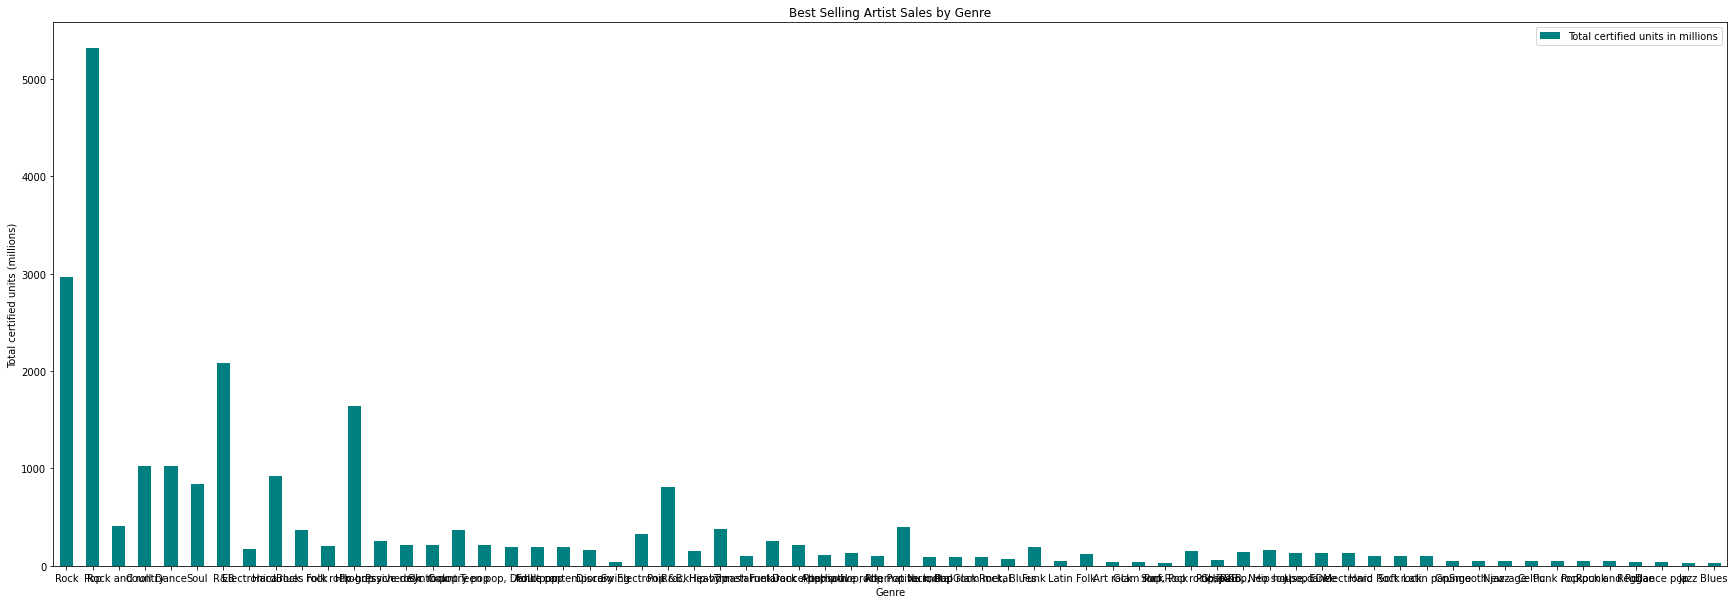

In [81]:
# Bar Chart
genres_bar_chart = Genre_with_most_sales.plot.bar(x='Unique Genres', y='Total certified units in millions', rot=0, color='teal')
plt.xlabel("Genre")
plt.ylabel("Total certified units (millions)")
plt.title("Best Selling Artist Sales by Genre")
plt.gcf().set_size_inches(30,10)
avg_net_worth = plt.show()
    

In [82]:
Genre_with_most_sales.describe()

,Total certified units in millions
count,64.000000
mean,382.968750
std,804.751998
min,26.100000
25%,60.325000
50%,134.750000
75%,251.975000
max,5319.300000


***Spotify Weekly Top 200 Streams***

In [83]:
# Find the artist with the most songs in the data set without features.


# Get the list of unique artist 
unique_artist = spotifyWeeklyTop200Streams.Artist.unique()
# unique_artist

artist_dict = dict.fromkeys(unique_artist, 0)

# count every time they have a song in the list 
for index in range(len(spotifyWeeklyTop200Streams)):
    for artist in unique_artist:
        if spotifyWeeklyTop200Streams['Artist'].iloc[index] == artist:
            artist_dict[artist] = artist_dict[artist] + 1

# Ran into an ValueError with the name Joey Bada$$ need to replace with Joey BaddaSS
artist_dict['Joey BadaSS'] = artist_dict['Joey Bada$$'] 
del artist_dict['Joey Bada$$'] 

#artist_dict 

In [84]:
Most_apperences_by_artist = pd.DataFrame(list(artist_dict.items()),columns = ['Artist','Number of Songs that Made the Top 200']) 
Most_apperences_by_artist

,Artist,Number of Songs that Made the Top 200
0,Drake,922
1,Juice WRLD,430
2,Ariana Grande,379
3,XXXTENTACION,878
4,Tyga,85
5,Cardi B,297
6,Maroon 5,150
7,Post Malone,1029
8,Childish Gambino,120
9,Lil Baby,233


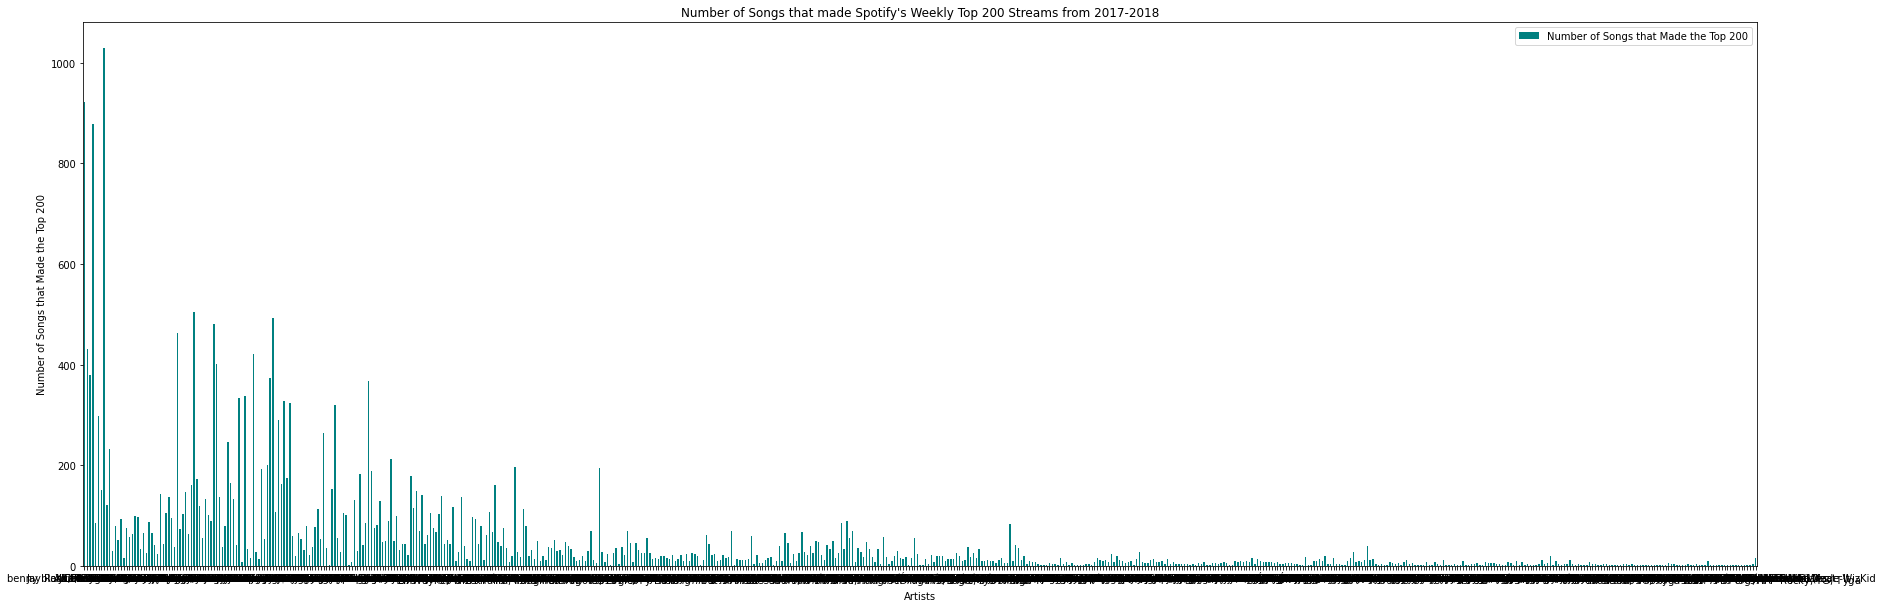

In [86]:
# Bar Chart

Artist_chart = Most_apperences_by_artist.plot.bar(x='Artist', y='Number of Songs that Made the Top 200', rot=0, color='teal')
plt.xlabel("Artists")
plt.ylabel("Number of Songs that Made the Top 200")
plt.title("Number of Songs that made Spotify's Weekly Top 200 Streams from 2017-2018")
plt.gcf().set_size_inches(30,10)
plt.show()


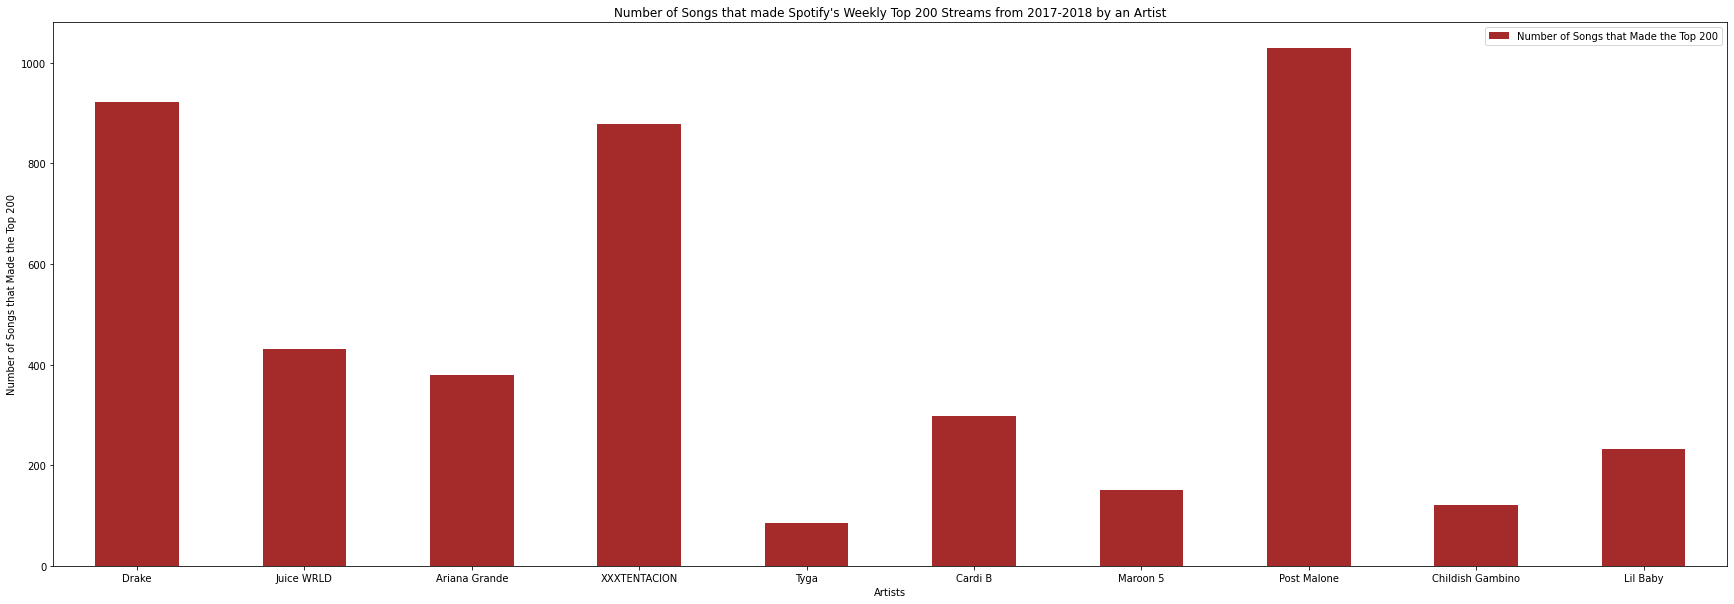

In [87]:
# Data set too large going to put the list in acending then take the top 10.
 
top10Artist = Most_apperences_by_artist.head(10)

Artist_chart = top10Artist.plot.bar(x='Artist', y='Number of Songs that Made the Top 200', rot=0, color='brown')
plt.xlabel("Artists")
plt.ylabel("Number of Songs that Made the Top 200")
plt.title("Number of Songs that made Spotify's Weekly Top 200 Streams from 2017-2018 by an Artist")
plt.gcf().set_size_inches(30,10)
plt.show()


In [88]:
# Find the artist with the most features in the data set.

# Get the list of unique features 
unique_features = spotifyWeeklyTop200Streams.Features.unique()
#unique_features

In [89]:
features_dict = dict.fromkeys(unique_features, 0)

# count every time they have been featured in a song in the dataset 
for index in range(len(spotifyWeeklyTop200Streams)):
    for feature in unique_features:
        if spotifyWeeklyTop200Streams['Features'].iloc[index] == feature:
            features_dict[feature] = features_dict[feature] + 1
        
            
del features_dict['No Features'] 
features_dict

Most_features_by_artist = pd.DataFrame(list(features_dict.items()),columns = ['Artist that were Features','Number of Songs featured in that Made the Top 200']) 

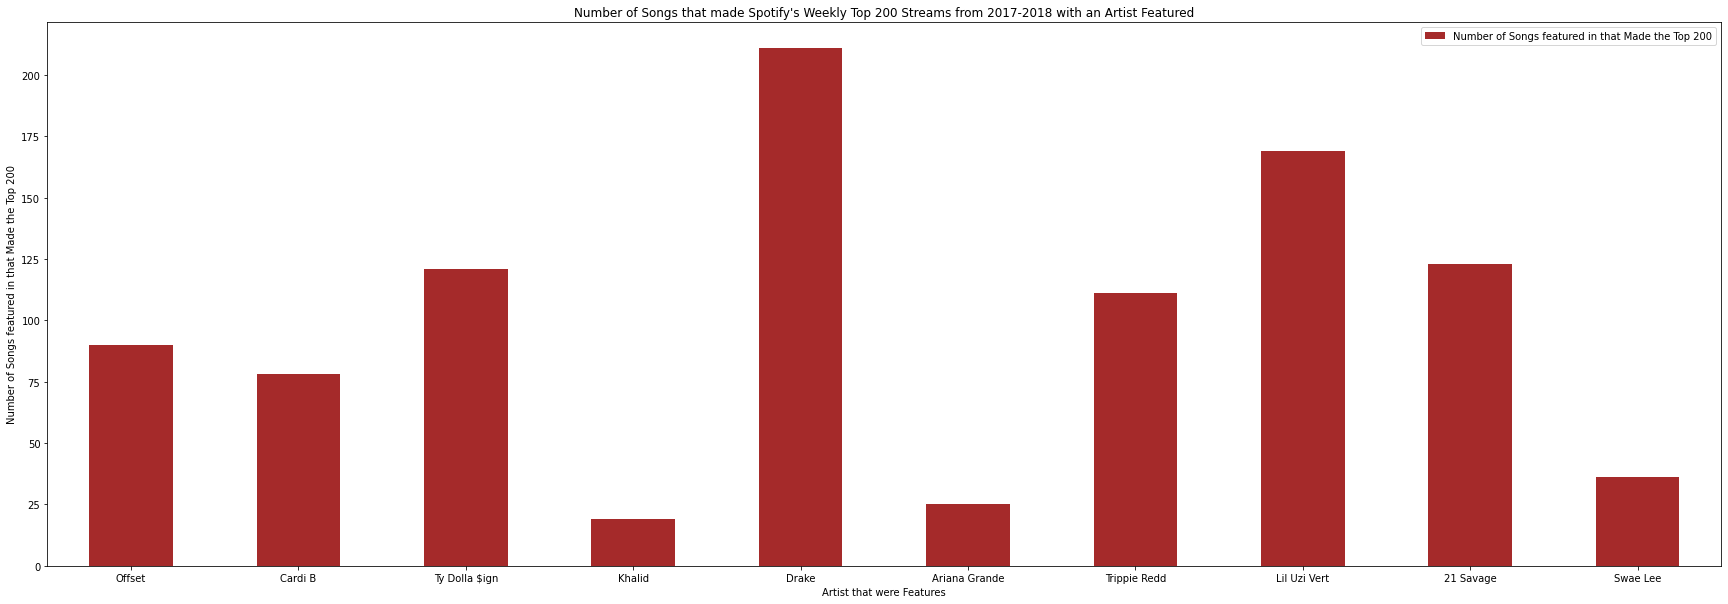

In [90]:
# Again Since the list is long we are only taking the top 10
top10features = Most_features_by_artist.head(10)

Artist_chart = top10features.plot.bar(x='Artist that were Features', y='Number of Songs featured in that Made the Top 200', rot=0, color='brown')
plt.xlabel("Artist that were Features")
plt.ylabel("Number of Songs featured in that Made the Top 200")
plt.title("Number of Songs that made Spotify's Weekly Top 200 Streams from 2017-2018 with an Artist Featured")
plt.gcf().set_size_inches(30,10)
plt.show()

In [8]:
# Creating readable stream values for histogram
# multiplying string numbers by 10^-4 to get a better looking histogram
def make_streams_readable(stream_count):
    readable_stream_count = stream_count * (10**-4)
    return readable_stream_count

streams = spotifyWeeklyTop200Streams['Streams'].apply(make_streams_readable)
streams

0        3074.7676
1        1293.0705
2        1231.2859
3        1077.1324
4        1050.3061
           ...    
26390     152.1806
26391     151.8345
26392     151.6966
26393     148.6767
26394     148.6662
Name: Streams, Length: 26395, dtype: float64

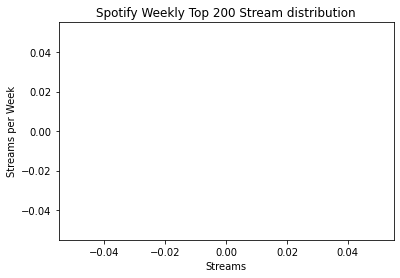

In [12]:
# Histogram of the stream range for songs on the Spotify Weekly Top 200 Streams

stream_bins = np.arange(120, 3100, 500) 
plt.hist(spotifyWeeklyTop200Streams.Streams, stream_bins,density=True, edgecolor = 'black', linewidth = 1.2) # denisty parameter gives us a relative distribution value
plt.title('Spotify Weekly Top 200 Stream distribution')
plt.xlabel("Streams")
plt.ylabel("Streams per Week")
plt.show()


# Topic Conclusions
Based on what you found about your topic communicate it to the audience. How did the data analysis steps you took help you solve the problem or find out more information about the problem. Example:

I wanted to explore if the average actor can live comfortably in California. I downloaded this dataset s and webscrapped this dataset. I did some stuff. I found that actors that live outside of california can afford to buy a home. Others can't. Blah blah blah blah

***Best Selling music Artist***
The data shows that the Pop Genre has made the most money was the best selling artist are organized by genre.
I also found that some of the genre field were not being counted correctly because some artist belong to multiple catagoried. 

# Future Exploration
List what you wish you could do with more knowledge about the topic. Also use this section to save aspects of your data into a new csv file for use in this future exploration. 

***Best Selling music Artist***
For Future work I would definatly do a better job of visualizing the data the graph isn't very visable be causeof the large range of numbers.
It may be intresting to see where these best selling artist are from. To check to see if there is a corrilation between counties and sales.